<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

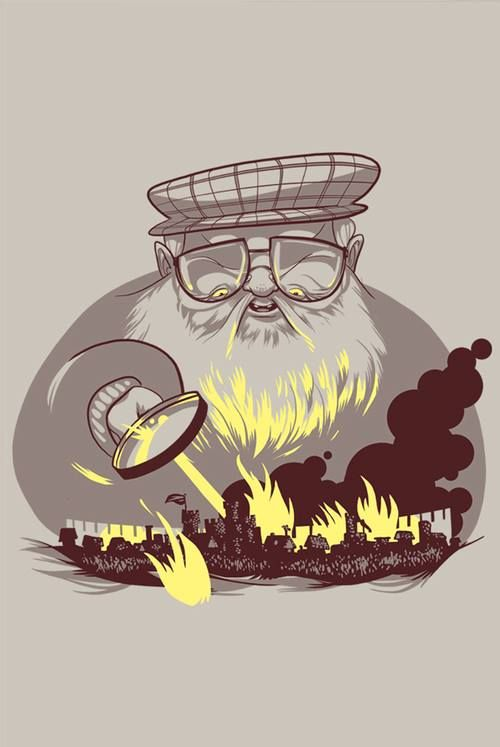

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
# !gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
# !gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
df_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
def fillnas(df: pd.DataFrame) -> None:
    df['dateOfBirth'] = df.dateOfBirth.fillna(df.dateOfBirth.quantile(0.5))
    df['age'] = df['age'].fillna(40)

fillnas(df)
fillnas(df_test)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [5]:
house_counts = df.house.value_counts()
big_houses = house_counts[house_counts >= 30].index

def add_features(df: pd.DataFrame) -> None:
    df['big_house'] = df.house.isin(big_houses).astype(int)
    df['booked'] = df.book4 | df.book5
    df['old'] = df.dateOfBirth + df.age < 305
    df['has_title'] = df.title.notna()
    df['long_name'] = df.name.str.len() > 8
    # df['isPopular'] = df.popularity > 0.5

    # df['important'] = df.long_name & df.isPopular

    # popular = df.popularity > 0.5
    # unpopular = df.popularity < 0.3

    # df['dateOfBirth'] = scaler.fit_transform(df[['dateOfBirth']])
    
    # df['has_heir'] = df.heir.notna().astype(int)

add_features(df)
add_features(df_test)

In [6]:
house = df.house.str.split().str[-1]
# big_houses = house.value_counts().nlargest(10).index


def add_surname(df: pd.DataFrame) -> None:
    house_name = df.house.str.split().str[-1]
    df['Watch'] = house_name == 'Watch'
    df['Targaryen'] = house_name == 'Targaryen'
    df['Other'] = ~house_name.isin(['Watch', 'Targaryen'])

# df_house_name = df.house.str.split().str[-1]
# surname = df_house_name.where(df_house_name.isin(big_houses), 'Other')
# df = pd.concat([df, pd.get_dummies(surname)], axis=1)
# least_correlated = df[big_houses].corrwith(df.isAlive).abs().nsmallest(3)

# surname_corr = pd.concat([df, pd.get_dummies(surname)], axis=1)[[*surname.unique(), 'isAlive']].corr()
# sns.heatmap(surname_corr, cmap="YlGnBu", fmt=".2f", annot=True, square=True);

add_surname(df)
add_surname(df_test)
# big_houses
# df.iloc[30:50]

In [7]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def unify_culture(name):
    for unified_name, names in cult.items():
        if isinstance(name, float):
            return 'Other'
        if isinstance(name, str) and name.lower() in [n.lower() for n in names]:
            return unified_name
    return name

cult = df['culture'].apply(unify_culture)
cult_counts = cult.value_counts()
minor_cults = cult_counts[cult_counts < 40].index

def add_cult(df: pd.DataFrame) -> None:
    df['cult'] = df['culture'].apply(unify_culture)
    df['of_big_cult'] = df.cult.isin(minor_cults)

# add_cult(df)
# add_cult(df_test)

# df.of_big_cult.mean()


In [8]:
# house_counts = df.house.value_counts()
# big_houses = house_counts[house_counts > 25].index
# house_dummies = pd.get_dummies(df.house, prefix='house', drop_first=True)
# df.join(house_dummies)
# df

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [9]:
def drop_useless_cols(df: pd.DataFrame) -> None:
    COLUMNS_TO_DROP = [
        'name',
        'mother',
        'father',
        'house',
        'heir',
        'spouse',
        'isAliveMother',
        'isAliveFather',
        'isAliveSpouse',
        'isAliveHeir',
        'culture',
        'title',
        'male',
        # 'popularity',
        'has_title',
        'long_name',
        'big_house',
        #
        'book1',
        'book2',
        'book3',
        # 'book4',
        # 'book5',
        'isMarried',
        # 'isNoble',
        'age',
        # 'dateOfBirth',
        # 'cult',
    ]
    df.drop(columns=COLUMNS_TO_DROP, inplace=True)

drop_useless_cols(df)
drop_useless_cols(df_test)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

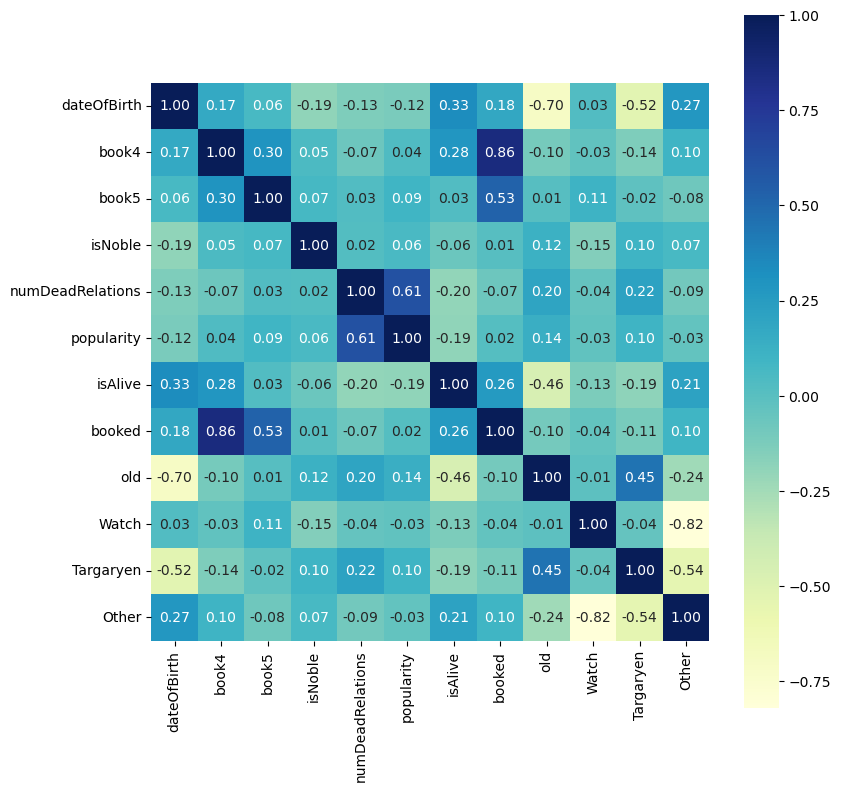

In [10]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), cmap="YlGnBu", fmt=".2f", annot=True, square=True);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [11]:
X = df.drop(columns='isAlive').values
y = df.isAlive.values

X_control = df_test.values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_control = scaler.transform(X_control)

In [14]:
# selector = SelectKBest(score_func=f_classif, k=5)
# selector.fit(X_train, y_train)

# X_train = selector.transform(X_train)
# X_test = selector.transform(X_test)
# X_control = selector.transform(X_control)

## Обучение

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

MODELS = [
    LogisticRegression(C=1, max_iter=1000, random_state=42),
    RandomForestClassifier(
        n_jobs=-1,
        n_estimators=200,
        random_state=42,
        criterion='gini',
        # criterion='entropy',
        # max_depth=9,
        # max_depth=11,
        max_depth=14,
        # max_features='sqrt',
        # min_samples_leaf=2,
        # min_samples_leaf=3,
        min_samples_leaf=5,
        # min_samples_leaf=7,
    ),
    AdaBoostClassifier(algorithm='SAMME', random_state=42),
    GaussianNB(),
    KNeighborsClassifier(n_jobs=-1),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel='rbf', random_state=42),
    GaussianProcessClassifier(n_restarts_optimizer=5, n_jobs=-1, random_state=42),
]
PREDICTIONS = []
for model in MODELS:
    model_k_accuracies = []
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]

        model.fit(X_train_k, y_train_k)
        y_pred_k = model.predict(X_test_k)
        k_accuracy = accuracy_score(y_test_k, y_pred_k)
        model_k_accuracies.append(k_accuracy)

    train_accuracy = np.mean(model_k_accuracies)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    PREDICTIONS.append((model, train_accuracy, test_accuracy))

PREDICTIONS.sort(key=lambda x: x[2], reverse=True)

## Результаты

In [16]:
for model, train_accuracy, test_accuracy in PREDICTIONS:
    print(f"{train_accuracy:.4f} / {test_accuracy:.4f}  {model}")

0.8541 / 0.8547  RandomForestClassifier(max_depth=14, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)
0.8511 / 0.8504  AdaBoostClassifier(algorithm='SAMME', random_state=42)
0.8473 / 0.8504  SVC(random_state=42)
0.8405 / 0.8419  LogisticRegression(C=1, max_iter=1000, random_state=42)
0.8458 / 0.8333  GaussianProcessClassifier(n_jobs=-1, n_restarts_optimizer=5, random_state=42)
0.8277 / 0.8205  GaussianNB()
0.8436 / 0.8205  KNeighborsClassifier(n_jobs=-1)
0.8247 / 0.7991  DecisionTreeClassifier(random_state=42)


In [8832]:
# Предсказание на тестовых данных
best_model, train_accuracy, test_accuracy = PREDICTIONS[0]
print(f'{best_model} {test_accuracy:.4f}')

control_pred = best_model.predict(X_control)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42) 0.8504


In [8751]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 200,],
    'max_depth': np.arange(10, 15),
    'min_samples_leaf': np.arange(2, 10),
    'max_features': ('sqrt', 'log2'),
    'criterion': ('gini', 'entropy'),
}
gridsearch = GridSearchCV(
    estimator=RandomForestClassifier(
        n_jobs=-1,
        n_estimators=150,
        random_state=42,
        criterion='entropy',
        max_depth=14,
        max_features='sqrt',
        min_samples_leaf=3,
), 
    param_grid=param_grid, 
    refit=True, 
    scoring=make_scorer(accuracy_score)
)
# gridsearch.fit(X_train, y_train)

# # выведем наилучшие параметры
# print(gridsearch.best_params_)

# best_model = gridsearch.best_estimator_
# gridsearch.best_score_

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.8556203544882791

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [8696]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [8697]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [8698]:
submission.isAlive = control_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [8699]:
submission.to_csv("new_submission.csv")